# Analyse des données sur les matchs de Ligue 1

In [1]:
#on import les bibliothèques qui nious serons utilses 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# on importe toutes les données et on les ranges dans un dictionnaire tout en enlevant les données inutiles
#on va aussi transformer les lettres H, D, A en 2,1,0
DF = {}
for i in range(2005,2021) : #entre 2005 et 2021
    dataFrame = pd.read_csv("../DataSets/" + str(i) + "_" + str(i+1) + ".csv") 
    indexB365H = list(dataFrame.columns).index("B365H") # Index de la première colone à supprimer. On transforme en liste car on .index() ne s'applique pas au Index. 
    for c in range(indexB365H,len(dataFrame.columns)) : 
        dataFrame = dataFrame.drop(columns=[dataFrame.columns[len(dataFrame.columns)-1]],axis=1)
    
    #pour transformer les lettres pour le full time result
    dataFrame.loc[dataFrame['FTR'] == 'H',['FTR']] = 2
    dataFrame.loc[dataFrame['FTR'] == 'D',['FTR']] = 1
    dataFrame.loc[dataFrame['FTR'] == 'A',['FTR']] = 0
    
    #pour transformer les lettres pour le halftime result
    dataFrame.loc[dataFrame['HTR'] == 'H',['HTR']] = 2
    dataFrame.loc[dataFrame['HTR'] == 'D',['HTR']] = 1
    dataFrame.loc[dataFrame['HTR'] == 'A',['HTR']] = 0
    DF[str(i) + "_" + str(i+1)] = dataFrame
    print("nombre de colonnes saisons ", i,"/",i+1, ":", len(dataFrame.columns))



nombre de colonnes saisons  2005 / 2006 : 18
nombre de colonnes saisons  2006 / 2007 : 20
nombre de colonnes saisons  2007 / 2008 : 22
nombre de colonnes saisons  2008 / 2009 : 22
nombre de colonnes saisons  2009 / 2010 : 22
nombre de colonnes saisons  2010 / 2011 : 22
nombre de colonnes saisons  2011 / 2012 : 22
nombre de colonnes saisons  2012 / 2013 : 22
nombre de colonnes saisons  2013 / 2014 : 22
nombre de colonnes saisons  2014 / 2015 : 22
nombre de colonnes saisons  2015 / 2016 : 22
nombre de colonnes saisons  2016 / 2017 : 22
nombre de colonnes saisons  2017 / 2018 : 22
nombre de colonnes saisons  2018 / 2019 : 22
nombre de colonnes saisons  2019 / 2020 : 23
nombre de colonnes saisons  2020 / 2021 : 23


In [3]:
DF["2015_2016"].head(5)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,F1,07/08/15,Lille,Paris SG,0.0,1.0,0,0.0,0.0,1,...,2.0,2.0,20.0,17.0,3.0,2.0,3.0,2.0,0.0,1.0
1,F1,08/08/15,Bastia,Rennes,2.0,1.0,2,0.0,1.0,0,...,3.0,3.0,15.0,19.0,6.0,2.0,0.0,1.0,1.0,0.0
2,F1,08/08/15,Marseille,Caen,0.0,1.0,0,0.0,1.0,0,...,4.0,4.0,10.0,10.0,14.0,2.0,1.0,0.0,0.0,0.0
3,F1,08/08/15,Montpellier,Angers,0.0,2.0,0,0.0,1.0,0,...,4.0,6.0,12.0,15.0,5.0,9.0,3.0,2.0,0.0,0.0
4,F1,08/08/15,Nantes,Guingamp,1.0,0.0,2,0.0,0.0,1,...,4.0,4.0,13.0,16.0,6.0,2.0,2.0,2.0,0.0,0.0


# Définition des colonnes des tableaux

|Nom de la colonne|signification|
|--------|--------|
|Div | League Division|
|Date | Match Date (dd/mm/yy)|
|Time | Time of match kick off|
|HomeTeam | Home Team|
|AwayTeam | Away Team|
|FTHG and HG | Full Time Home Team Goals|
|FTAG and AG | Full Time Away Team Goals|
|FTR and Res | Full Time Result (H=Home Win, D=Draw, A=Away Win)|
|HTHG | Half Time Home Team Goals|
|HTAG | Half Time Away Team Goals|
|HTR |Half Time Result (H=Home Win, D=Draw, A=Away Win)|
|HS | Home Team Shots|
|AS | Away Team Shots|
|HST | Home Team Shots on Target|
|AST | Away Team Shots on Target|
|HHW | Home Team Hit Woodwork|
|AHW | Away Team Hit Woodwork|
|HC | Home Team Corners|
|AC | Away Team Corners|
|HF | Home Team Fouls Committed|
|AF | Away Team Fouls Committed|
|HY | Home Team Yellow Cards|
|AY | Away Team Yellow Cards|
|HR | Home Team Red Cards|
|AR | Away Team Red Cards|


## Analyse des données

In [4]:
DF['2015_2016'].describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.436842,1.089474,0.600000,0.463158,12.792105,10.239474,4.531579,3.694737,12.960526,13.752632,5.407895,4.157895,1.736842,2.021053,0.157895,0.150000
std,1.280547,1.149691,0.804342,0.693894,4.560521,3.922470,2.340772,2.194133,4.052560,4.303998,2.702377,2.598217,1.106093,1.243274,0.379301,0.399373
min,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.000000,0.000000,0.000000,9.000000,8.000000,3.000000,2.000000,10.000000,11.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,12.000000,10.000000,4.000000,3.000000,13.000000,14.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,13.000000,6.000000,5.000000,16.000000,16.250000,7.000000,6.000000,2.000000,3.000000,0.000000,0.000000
max,6.000000,9.000000,4.000000,3.000000,29.000000,31.000000,15.000000,15.000000,25.000000,26.000000,14.000000,18.000000,5.000000,6.000000,2.000000,2.000000


In [5]:
def plot_corr(corr): #fonction pour tracer les corrélations entre les variables
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap)


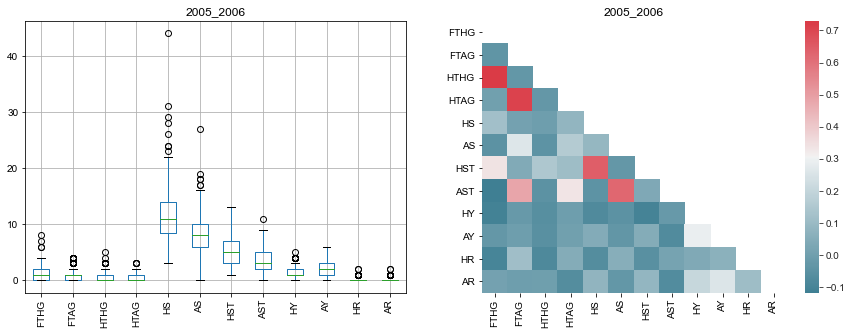

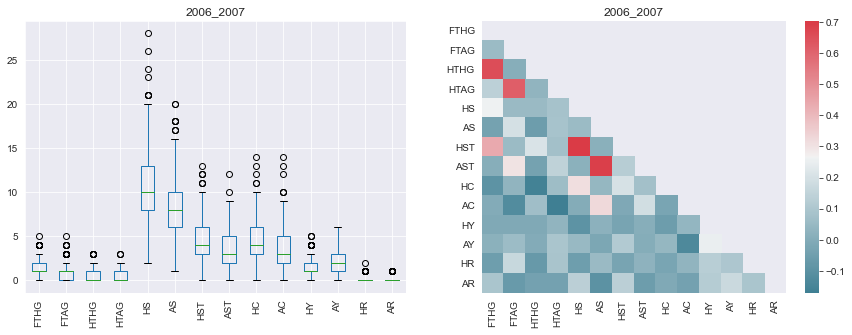

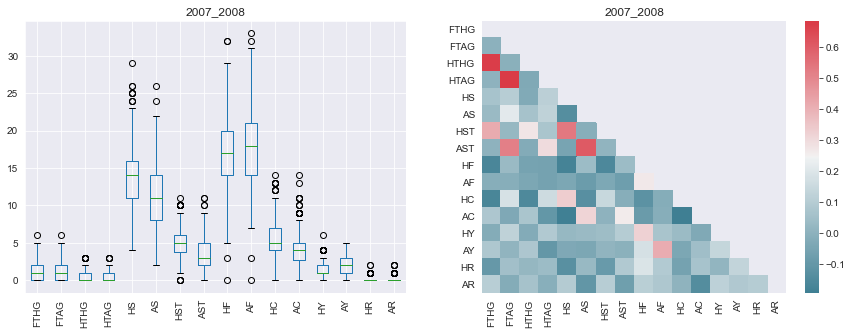

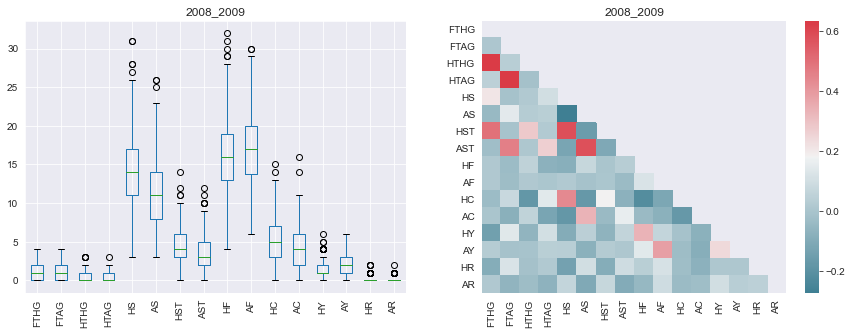

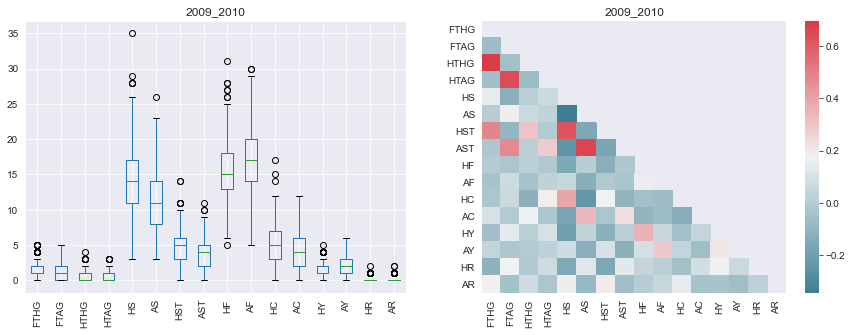

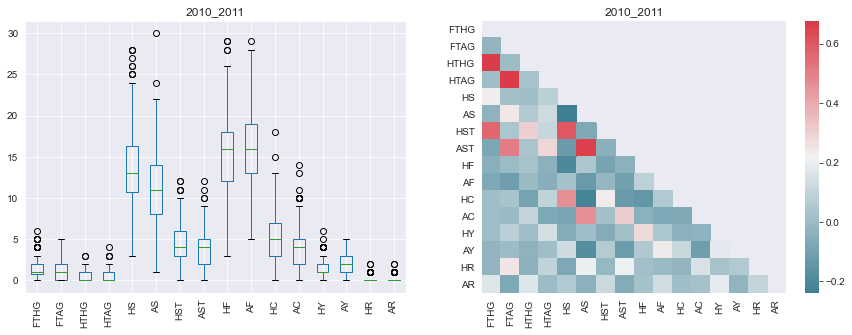

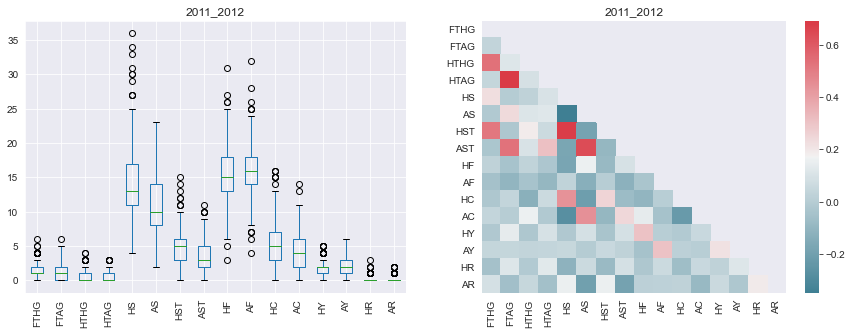

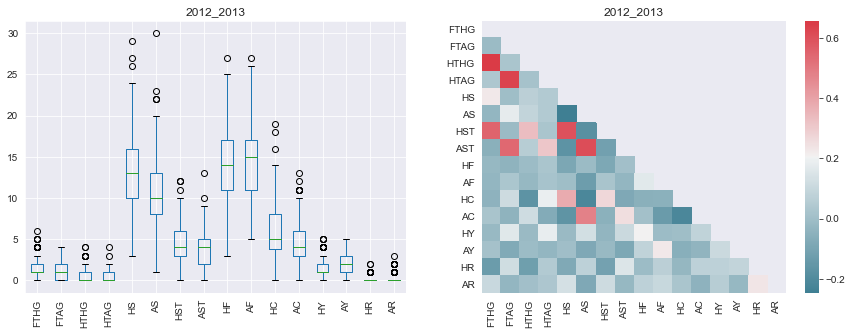

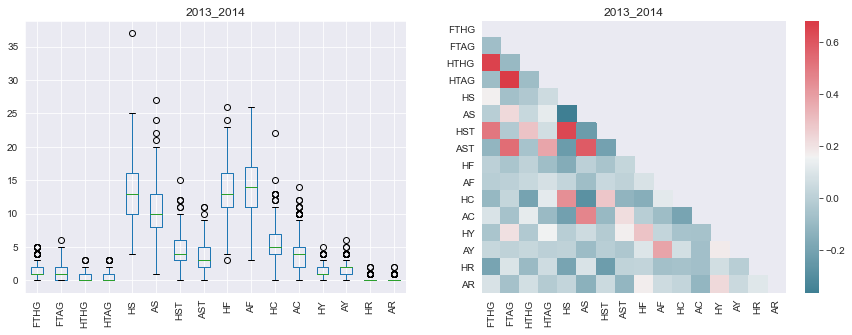

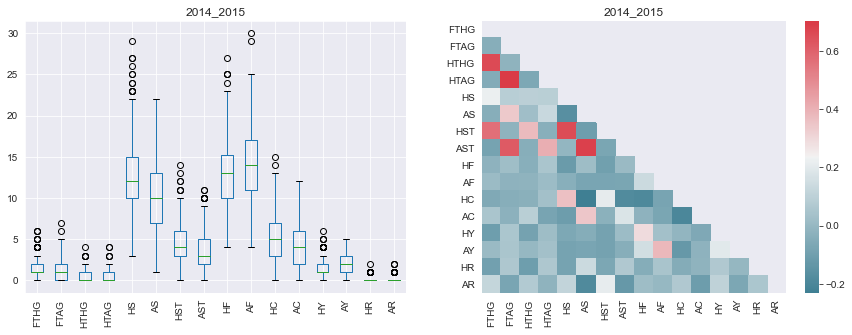

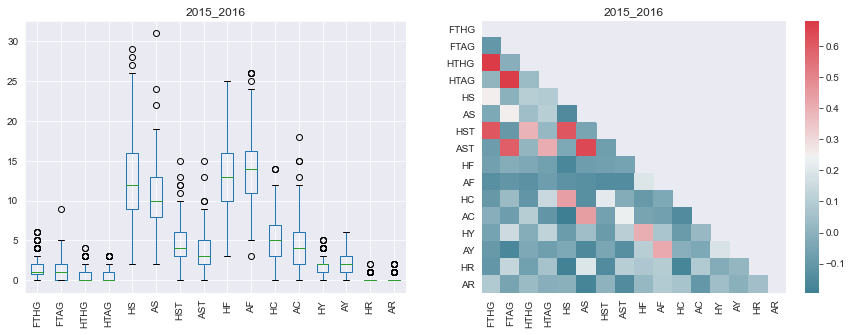

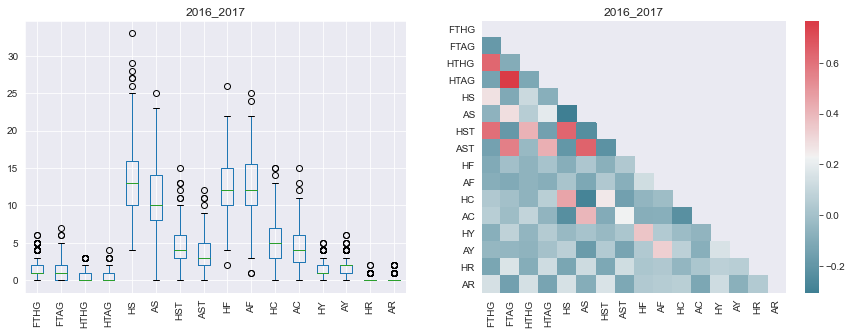

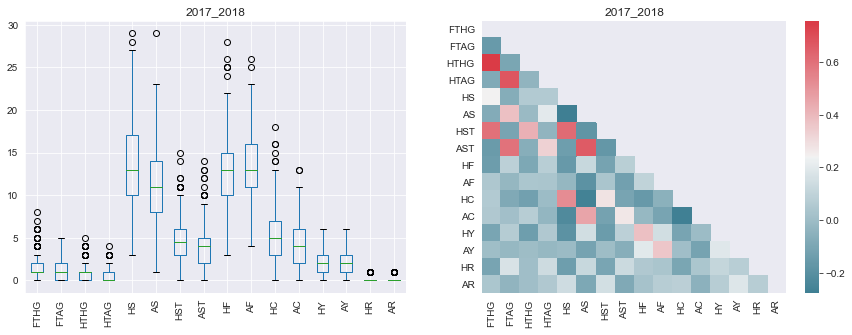

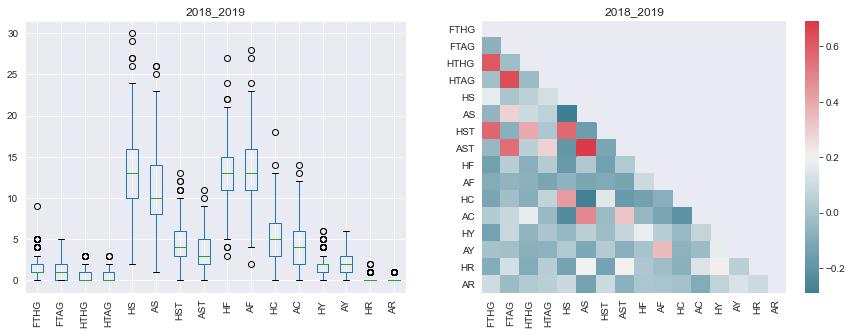

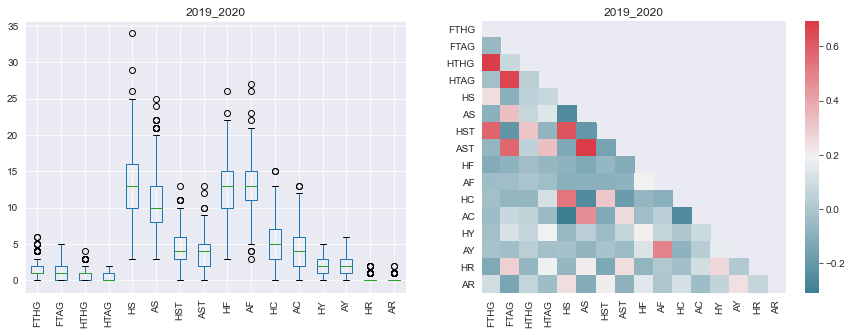

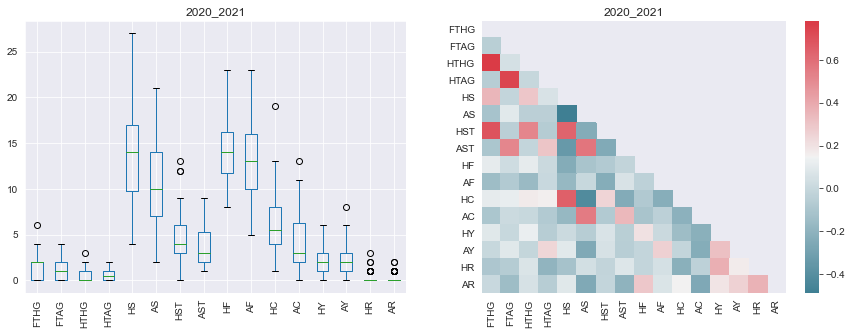

In [6]:
i=1 #index figure
for key in DF :
    plt.figure(i,figsize=(15,5))
    plt.subplot(121)
    DF[key].boxplot()
    plt.xticks(rotation='vertical')
    plt.title(key)

    plt.subplot(122)
    sns.set_style('darkgrid')
    plt.rc('figure', figsize=[8, 6])
    plt.xticks(rotation='vertical')
    corr = DF[key].corr()
    plot_corr(corr)
    plt.title(key)
    
    i += 1 #pour changer de figure
    plt.show()

### 1)Nombre moyen de but

In [6]:
seasons = []
HomeGoals = []
AwayGoals = []
for key in DF : 
    seasons.append(key)
    HomeGoals.append(DF[key].describe()['FTHG']['mean']) #pour récuperer le nombre de but moyen marqué par l'équipe à domicile
    AwayGoals.append(DF[key].describe()['FTAG']['mean'])#pour récuperer le nombre de but moyen marqué par l'équipe à l'exterieur

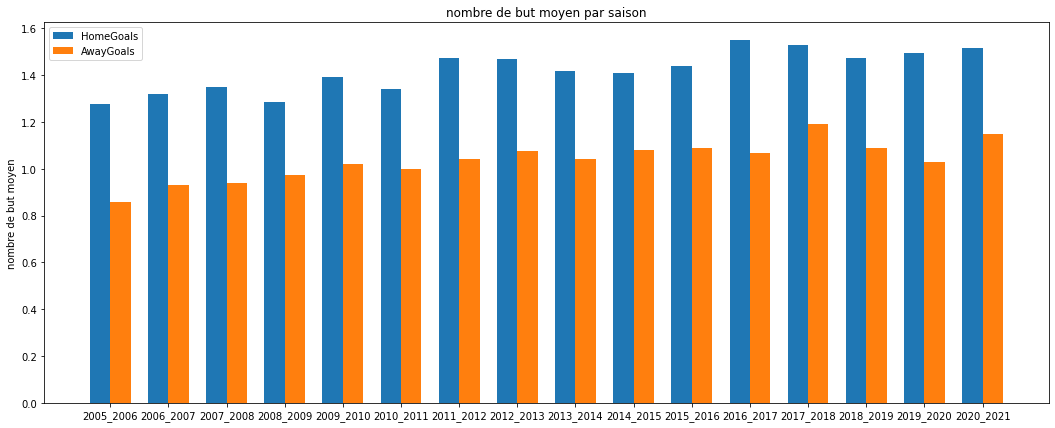

In [7]:
#tracé des graphes
x=np.arange(len(seasons))
width=0.35

fig, ax = plt.subplots(figsize=(18,7))
rects1 = ax.bar(x-width/2, HomeGoals, width, label="HomeGoals")
rects2 = ax.bar(x+width/2,AwayGoals, width, label="AwayGoals")

ax.set_ylabel('nombre de but moyen')
ax.set_title('nombre de but moyen par saison')
ax.set_xticks(x)
ax.set_xticklabels(seasons)
ax.legend()

plt.show()

### 2)Nombre moyen de tir

In [8]:
HomeShoots = []
AwayShoots = []
for key in DF : 
    HomeShoots.append(DF[key].describe()['HS']['mean'])
    AwayShoots.append(DF[key].describe()['AS']['mean'])

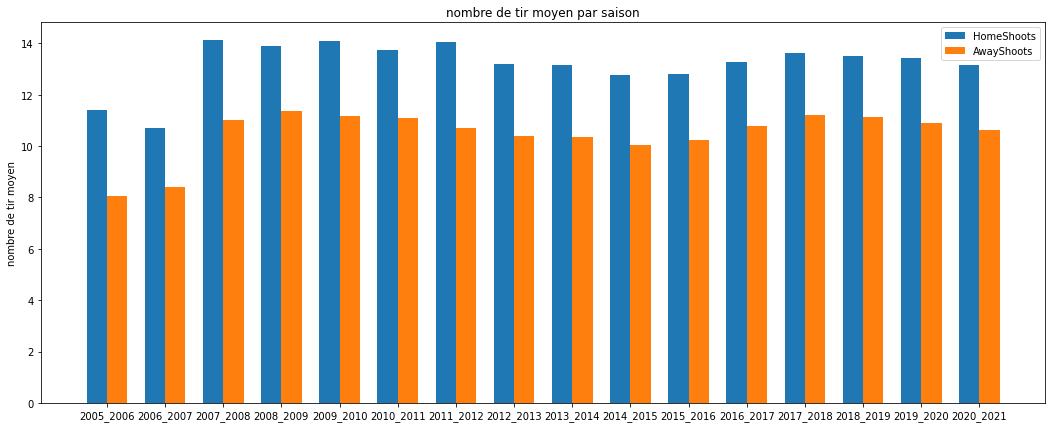

In [9]:
#tracé des graphes
x=np.arange(len(seasons))
width=0.35

fig, ax = plt.subplots(figsize=(18,7))
rects1 = ax.bar(x-width/2, HomeShoots, width, label="HomeShoots")
rects2 = ax.bar(x+width/2,AwayShoots, width, label="AwayShoots")

ax.set_ylabel('nombre de tir moyen')
ax.set_title('nombre de tir moyen par saison')
ax.set_xticks(x)
ax.set_xticklabels(seasons)
ax.legend()

plt.show()

### Nombre moyen de carton rouge et jaune

In [7]:
HomeYellowCards = []
AwayYellowCards = []
HomeRedCards = []
AwayRedCards = []
for key in DF : 
    HomeYellowCards.append(DF[key].describe()['HY']['mean']) 
    AwayYellowCards.append(DF[key].describe()['AY']['mean'])
    HomeRedCards.append(DF[key].describe()['HR']['mean']) 
    AwayRedCards.append(DF[key].describe()['AR']['mean'])

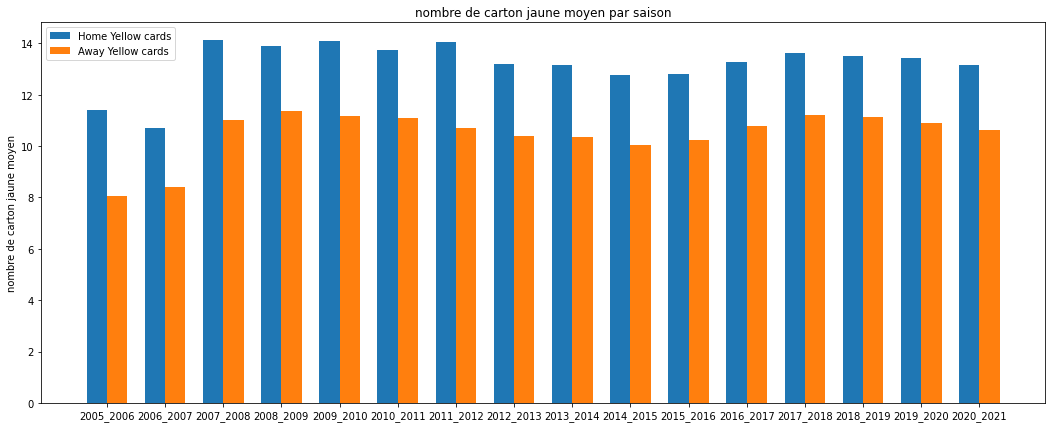

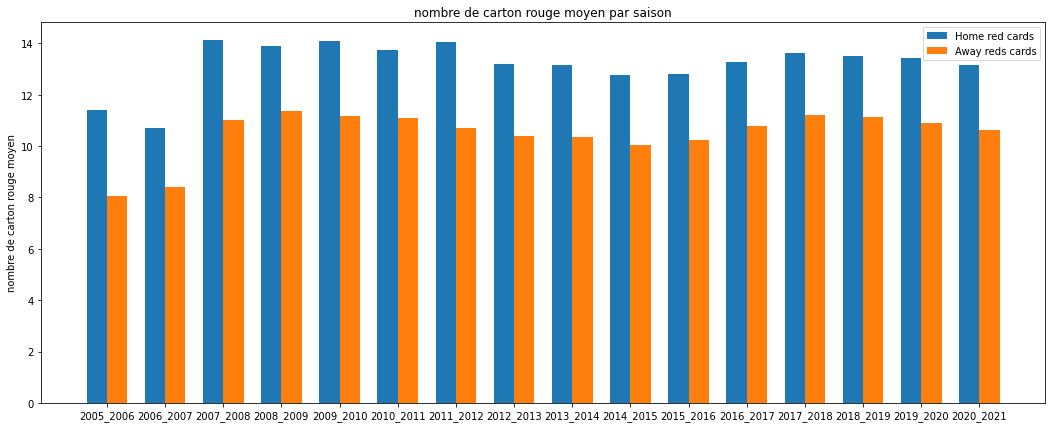

In [8]:
#tracé des graphes
x=np.arange(len(seasons))
width=0.35

fig1, ax1 = plt.subplots(figsize=(18,7))
rects11 = ax1.bar(x-width/2, HomeShoots, width, label="Home Yellow cards")
rects21 = ax1.bar(x+width/2,AwayShoots, width, label="Away Yellow cards")

ax1.set_ylabel('nombre de carton jaune moyen')
ax1.set_title('nombre de carton jaune moyen par saison')
ax1.set_xticks(x)
ax1.set_xticklabels(seasons)
ax1.legend()

fig2, ax2 = plt.subplots(figsize=(18,7))
rects21 = ax2.bar(x-width/2, HomeShoots, width, label="Home red cards")
rects22 = ax2.bar(x+width/2,AwayShoots, width, label="Away reds cards")

ax2.set_ylabel('nombre de carton rouge moyen')
ax2.set_title('nombre de carton rouge moyen par saison')
ax2.set_xticks(x)
ax2.set_xticklabels(seasons)
ax2.legend()

plt.show()

## Nouveau dataset

Mainteant que nous avons analysé les données il va falloir créer un nouveau dataset qui va nous permettre de de réaliser un algo pour anticiper le résultat d'un match

Tout d'abbord il nous faut des caractéristiques sur le match. Les key values seront :  les deux équipes, la division, la date et l'heure si jamais elle est présente.  
Ensuite des caractéristiques sur les matchs précédents vont permettre de définir la dynamique des équipes. Par exemple : le nombre de victoire, le nombre de défaite, le nombre d'égalité, le nombre de tir, le nombre de tir cadré pour les équipes à domicile et à l'exterieur depuis le début de la saison, le nombre de fautes et de cartons depuis le début de la saison.  
Il serait peut être interressant de regarder seulement les 5-6 derniers matchs pour la dynamique.  
Il serait peut être plus interressant d'utiliser des moyennes plutot que des buts totaux.  
**Ce code ne marche que à partir de 2007/2008 car les datasets des saisons précédentes n'ont pas toutes les variables nécéssaires.**  
Saison 2005/2006, il manque les corners et les fautes.  
Saison 2006/2007, Il manque les fautes.

In [30]:
season = "2019_2020"
df = DF[season]
new_df = df.copy()

#On initialise les listes qui vont comprendre les différentes valeurs pour chaque match et pour chaque équipe
#on les met dans des listes pour créer les colonnes à la fin
HomeTeamShootslist = []
HomeTeamShootOnTargetlist = []
HomeTeamWinlist = []
HomeTeamDrawlist = []
HomeTeamLooselist = []
HomeTeamFoulslist = []
HomeTeamYellowCardslist = []
HomeTeamRedCardslist = []
HomeTeamGoalslist = []
AwayTeamShootslist = []
AwayTeamShootOnTargetlist = []
AwayTeamWinlist = []
AwayTeamDrawlist = []
AwayTeamLooselist = []
AwayTeamFoulslist = []
AwayTeamYellowCardslist = []
AwayTeamRedCardslist = []
AwayTeamGoalslist = []
    
for i in range(len(new_df)): #on va balayer tout le dataset pour modifier tous les matchs
    Match = new_df.iloc[i] #on enregistre la ligne
    previousMatchDf = new_df.iloc[0:i] #on enregistre tous les match effectué précédemment
    HomeTeam = Match["HomeTeam"] #on enregistre l'équipe domicile et exterieur
    AwayTeam = Match["AwayTeam"]
    HomeTeamMatch = previousMatchDf.loc[(previousMatchDf["HomeTeam"] == HomeTeam) | (previousMatchDf["AwayTeam"] == HomeTeam)] #on enregistre les matchs effectués par l'équipe à domicile et l'équipe à l'exterieur
    AwayTeamMatch = previousMatchDf.loc[(previousMatchDf["HomeTeam"] == AwayTeam) | (previousMatchDf["AwayTeam"] == AwayTeam)]

    #Nombre de match effectué par les équipes
    MatchMadeHT = len(HomeTeamMatch)
    MatchMadeAT = len(AwayTeamMatch)
    
    #boucle pour étudier les données de l'équipe à domicile. On a des v araibles moyennes en générales
    HomeTeamGoals = 0
    HomeTeamShoots = 0
    HomeTeamShootOnTarget = 0
    HomeTeamWin = 0
    HomeTeamDraw =0
    HomeTeamLoose = 0
    HomeTeamFouls = 0
    HomeTeamYellowCards = 0
    HomeTeamRedCards = 0
    
    for index, row in HomeTeamMatch.iterrows(): #pour tous les matchs précédent à domicile ou à l'exterieur de l'équipe HomeTeam
        if(row["HomeTeam"] == HomeTeam): # Match à domicile de HomeTeam
            HomeTeamGoals += row["FTHG"]/MatchMadeHT #on incrémente les différentes variables
            HomeTeamShoots += row['HS']/MatchMadeHT
            HomeTeamShootOnTarget += row['HST']/MatchMadeHT
            HomeTeamFouls += row['HF']/MatchMadeHT
            HomeTeamYellowCards += row['HY']/MatchMadeHT
            HomeTeamRedCards += row['HR']/MatchMadeHT
            if(row['FTHG']>row['FTAG']): #on cherche si elle a gagné perdu ou fait égalité
                HomeTeamWin += 1
            if(row['FTHG'] == row['FTAG']):
                HomeTeamDraw += 1
            if(row['FTHG']<row['FTAG']): 
                HomeTeamLoose +=1
                
        else : #Match à l'exterieur de HomeTeam
            HomeTeamGoals += row["FTAG"]/MatchMadeHT #on incrémente les différentes varaibles
            HomeTeamShoots += row['AS']/MatchMadeHT
            HomeTeamShootOnTarget += row['AST']/MatchMadeHT
            HomeTeamFouls += row['AF']/MatchMadeHT
            HomeTeamYellowCards += row['AY']/MatchMadeHT
            HomeTeamRedCards += row['AR']/MatchMadeHT
            if(row['FTAG']>row['FTHG']):#on cherche si elle a gagné perdu ou fait égalité
                HomeTeamWin += 1
            if(row['FTAG'] == row['FTAG']):
                HomeTeamDraw += 1
            if(row['FTAG']<row['FTHG']): 
                HomeTeamLoose +=1
    
    
    
    #boucle chercher données de l'équipe à l'exterieur
    AwayTeamGoals = 0
    AwayTeamShoots = 0
    AwayTeamWin = 0
    AwayTeamDraw = 0
    AwayTeamLoose = 0
    AwayTeamShootOnTarget = 0
    AwayTeamFouls = 0
    AwayTeamYellowCards = 0
    AwayTeamRedCards = 0
    
    for index, row in AwayTeamMatch.iterrows():  #pour tous les matchs précédent à domicile ou à l'exterieur de l'équipe AwayTeam
        if(row["HomeTeam"] == AwayTeam): #Match à domicile de AwayTeam
            AwayTeamGoals += row["FTHG"]/MatchMadeAT#on incrémente les différentes varaibles
            AwayTeamShoots += row["HS"]/MatchMadeAT
            AwayTeamShootOnTarget += row['HST']/MatchMadeAT
            AwayTeamFouls += row['HF']/MatchMadeAT
            AwayTeamYellowCards += row['HY']/MatchMadeAT
            AwayTeamRedCards += row['HR']/MatchMadeAT
            if(row['FTHG']>row['FTAG']): #on cherche si elle a gagné perdu ou fait égalité
                AwayTeamWin += 1
            if(row['FTHG'] == row['FTAG']):
                AwayTeamDraw += 1
            if(row['FTHG']<row['FTAG']): 
                AwayTeamLoose +=1
            
        else : #Match à l'exterieur de AwayTeam
            AwayTeamGoals += row["FTAG"]/MatchMadeAT#on incrémente les différentes varaibles
            AwayTeamShoots += row["AS"]/MatchMadeAT
            AwayTeamShootOnTarget += row['AST']/MatchMadeAT
            AwayTeamFouls += row['AF']/MatchMadeAT
            AwayTeamYellowCards += row['AY']/MatchMadeAT
            AwayTeamRedCards += row['AR']
            if(row['FTAG']>row['FTHG']):#on cherche si elle a gagné perdu ou fait égalité
                AwayTeamWin += 1
            if(row['FTAG'] == row['FTHG']):
                AwayTeamDraw += 1
            if(row['FTAG']<row['FTHG']) : 
                AwayTeamLoose +=1
                
    #on rajoute les variables aux différentes listes            
    HomeTeamShootslist.append(HomeTeamShoots)
    HomeTeamShootOnTargetlist.append(HomeTeamShootOnTarget)
    HomeTeamWinlist.append(HomeTeamWin)
    HomeTeamDrawlist.append(HomeTeamDraw)
    HomeTeamLooselist.append(HomeTeamLoose)
    HomeTeamFoulslist.append(HomeTeamFouls)
    HomeTeamYellowCardslist.append(HomeTeamYellowCards)
    HomeTeamRedCardslist.append(HomeTeamRedCards) 
    HomeTeamGoalslist.append(HomeTeamGoals)
    AwayTeamShootslist.append(AwayTeamShoots)
    AwayTeamShootOnTargetlist.append(AwayTeamShootOnTarget)
    AwayTeamWinlist.append(AwayTeamWin)
    AwayTeamDrawlist.append(AwayTeamDraw)
    AwayTeamLooselist.append(AwayTeamLoose)
    AwayTeamFoulslist.append(AwayTeamFouls)
    AwayTeamYellowCardslist.append(AwayTeamYellowCards)
    AwayTeamRedCardslist.append(AwayTeamRedCards)
    AwayTeamGoalslist.append(AwayTeamGoals)

print(new_df.columns)
#On va maintenant enlever les données qui ne serve pas
indexFTHG = list(new_df.columns).index("FTHG") # Index de la première colone à supprimer. On transforme en liste car on .index() ne s'applique pas au Index.
dropIndex = indexFTHG #index pour supprimer les colonnes inutiles. 
for c in range(indexFTHG,len(new_df.columns)): #on enlève toutes les dernières colonnes
    if(new_df.columns[dropIndex]!='FTR'):
        new_df = new_df.drop(new_df.columns[dropIndex],axis=1)
    else :
        dropIndex +=1

#On va maintenant rajouter les colonnes à notre dataset
new_df['HTS'] = HomeTeamShootslist
new_df['HTST'] = HomeTeamShootOnTargetlist
new_df['HTW'] = HomeTeamWinlist
new_df['HTD'] = HomeTeamDrawlist
new_df['HTL'] = HomeTeamLooselist
new_df['HTF'] = HomeTeamFoulslist
new_df['HTY'] = HomeTeamYellowCardslist
new_df['HTR'] = HomeTeamRedCardslist
new_df['HTG'] = HomeTeamGoalslist
new_df['ATS'] = AwayTeamShootslist
new_df['ATST'] = AwayTeamShootOnTargetlist
new_df['ATW'] = AwayTeamWinlist
new_df['ATD'] = AwayTeamDrawlist
new_df['ATL'] = AwayTeamLooselist
new_df['ATF'] = AwayTeamFoulslist
new_df['ATY'] = AwayTeamYellowCardslist
new_df['ATR'] = AwayTeamRedCardslist
new_df['ATG'] = AwayTeamGoalslist



Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR'],
      dtype='object')


On enregistre le nouveau dataSet dans le dossier CleanDataSet

In [31]:
new_df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTR', 'HTS', 'HTST',
       'HTW', 'HTD', 'HTL', 'HTF', 'HTY', 'HTR', 'HTG', 'ATS', 'ATST', 'ATW',
       'ATD', 'ATL', 'ATF', 'ATY', 'ATR', 'ATG'],
      dtype='object')